Task 4: Conceptual Questions 

In [2]:
# 1. Entropy represents the level of disorder or impurity, and information gain quantifies how much uncertainty is reduced after a split.

# 2. Gini Index is computationally faster than Entropy and favors binary splits; Entropy is more theoretical, rooted in information theory.

# 3. Deep decision trees may memorize the training data, leading to overfitting. Limiting tree depth and using pruning techniques help prevent this.
    

Task 5: Decision Tree on Titanic Dataset 

Confusion Matrix:
 [[74 11]
 [22 36]]
Accuracy Score: 0.7692307692307693


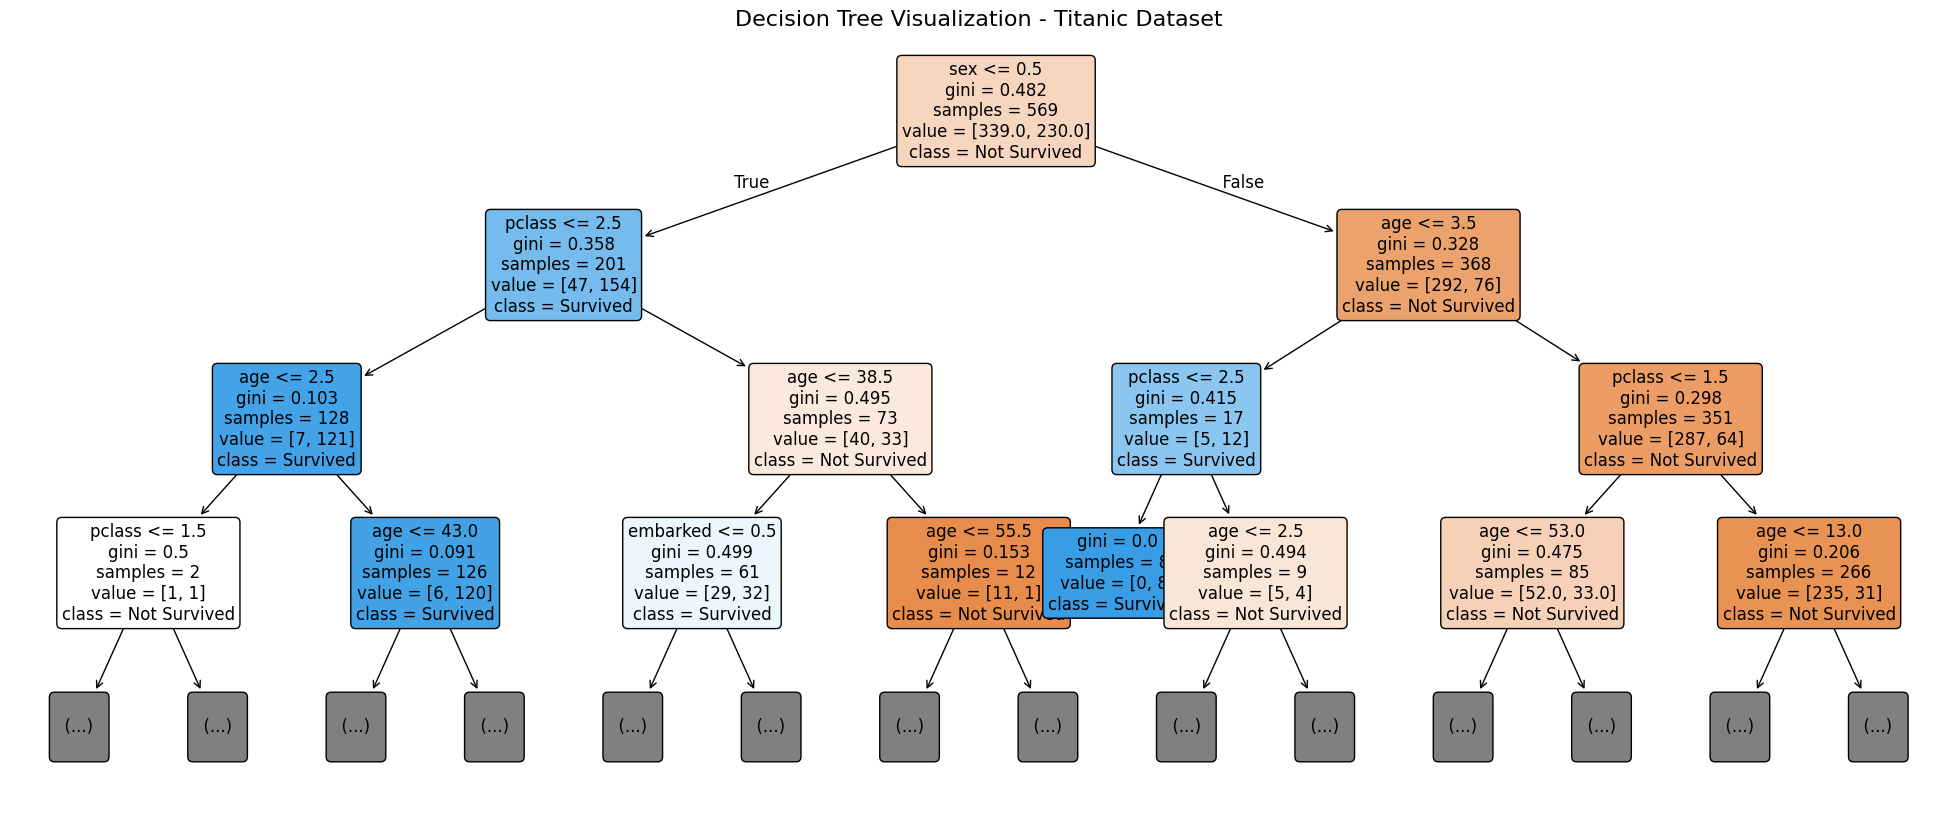

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Titanic dataset
titanic_data = sns.load_dataset('titanic')

# Select relevant features and drop rows with missing values
df = titanic_data[['sex', 'age', 'embarked', 'pclass', 'survived']].dropna()

# Encode categorical features
label_enc = LabelEncoder()
df['sex'] = label_enc.fit_transform(df['sex'])        # male:1, female:0
df['embarked'] = label_enc.fit_transform(df['embarked'])  # S:2, C:0, Q:1

# Define features and target
features = df.drop(columns=['survived'])
target = df['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)

# Predictions
preds = tree_clf.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Accuracy Score:", accuracy_score(y_test, preds))

plt.figure(figsize=(25, 10))

# Plot the decision tree
plot_tree(
    tree_clf,
    feature_names=features.columns,         
    class_names=["Not Survived", "Survived"], 
    filled=True,                             
    rounded=True,                            
    max_depth=3,                             
    fontsize=12                              
)

# Add a title to the plot
plt.title("Decision Tree Visualization - Titanic Dataset", fontsize=16)

# Display the plot
plt.show()


Task 6: Model Tuning

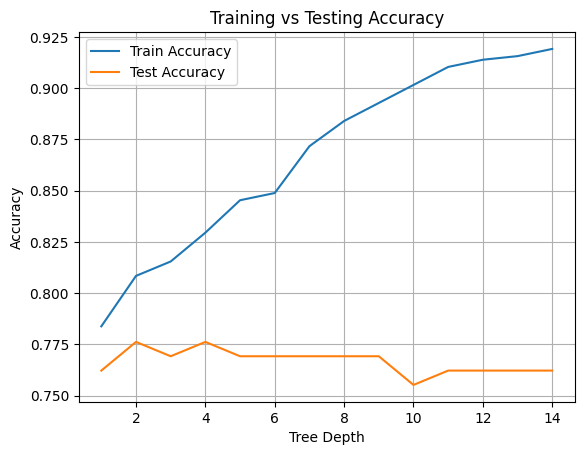

In [ ]:
import numpy as np

depths = range(1, 15)
train_scores = []
test_scores = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(depths, train_scores, label="Train Accuracy")
plt.plot(depths, test_scores, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.legend()
plt.grid(True)
plt.show()
